# Statistiques descriptives sur l'état de la consommation de cannabis en Europe

Je m'appuie sur la table dfcurrent. Voici un premier graphique qui présente l'état de la consommation pour la population adulte général. Pour chaque pays, il représente le pourcentage d'adultes qui déclarent avoir déjà consommé du cannabis, au moins une fois dans leur vie. 

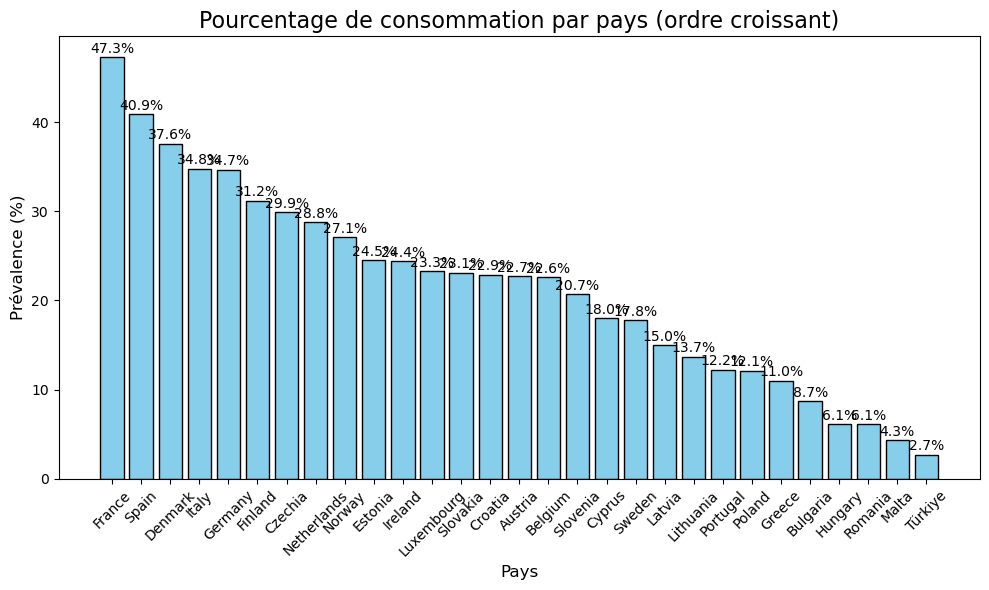

In [44]:
import pandas as pd

df = pd.read_csv('~/work/Projet_Python_2A/Data/EUDA/edr2024-gps-current-table-1.csv')

dfcurrent = df[df['Substance'] == 'Cannabis']

dfcurrentadults = dfcurrent[dfcurrent['Age'] == 'All adults (15-64)']

dfcurrentadultslf = dfcurrentadults[dfcurrentadults['Recall period'] == 'Lifetime']


import matplotlib.pyplot as plt


# Trier le DataFrame par ordre croissant de la colonne 'Prevalence (%)'
df_sorted = dfcurrentadultslf.sort_values(by='Prevalence (%)', ascending= False)

# Extraction des données triées
countries = df_sorted['Country']
prevalence = df_sorted['Prevalence (%)']

# Initialisation du graphique
plt.figure(figsize=(10, 6))

# Création du graphique en barres
plt.bar(countries, prevalence, color='skyblue', edgecolor='black')

# Ajout des titres et labels
plt.title('Pourcentage de consommation par pays (ordre croissant)', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Prévalence (%)', fontsize=12)

# Ajout des valeurs sur les barres (optionnel)
for i, value in enumerate(prevalence):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

# Rotation des étiquettes pour les pays si nécessaire
plt.xticks(rotation=45)

# Ajustement des marges
plt.tight_layout()

# Affichage
plt.show()

In [41]:
!pip install geopandas matplotlib requests cartiflette

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import os

# Télécharger le fichier shapefile de Natural Earth
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'

# Télécharger le fichier zip
response = requests.get(url)

# Charger le fichier ZIP depuis la réponse
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('ne_110m_admin_0_countries')

# Charger le shapefile depuis le dossier extrait
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Filtrer pour ne garder que les pays européens
europe = world[world['CONTINENT'] == 'Europe']

# Fusionner les données de prévalence avec les géométries
europe = europe.merge(dfcurrentadultslf, left_on='NAME', right_on='Country', how='left')

# Filtrer les pays avec des valeurs 'Prevalence (%)' non NaN
europe = europe.dropna(subset=['Prevalence (%)'])

# Tracer la carte de base
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
europe.boundary.plot(ax=ax, linewidth=0.5)

# Ajouter des cercles proportionnels à la prévalence
for _, row in europe.iterrows():
    # Utiliser le centroïde pour le positionnement du cercle
    centroid = row.geometry.centroid
    ax.scatter(
        centroid.x, centroid.y,  # Utiliser les coordonnées du centroïde
        s=row['Prevalence (%)'] * 50,  # Ajuster la taille des cercles
        color='blue', alpha=0.6, edgecolor='black'
    )

# Ajouter un titre
plt.title('Carte des pays européens en fonction de la consommation', fontsize=16)

# Afficher la carte
plt.tight_layout()
plt.show()


AttributeError: module 'lib' has no attribute 'X509_V_FLAG_NOTIFY_POLICY'

In [33]:
print(list(world.columns))

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

On veut désormais réaliser ce même graphique, mais en considérant uniquement la tranche d'âge des 15-34 ans, qui sont probablement plus exposés à cette consommation. 

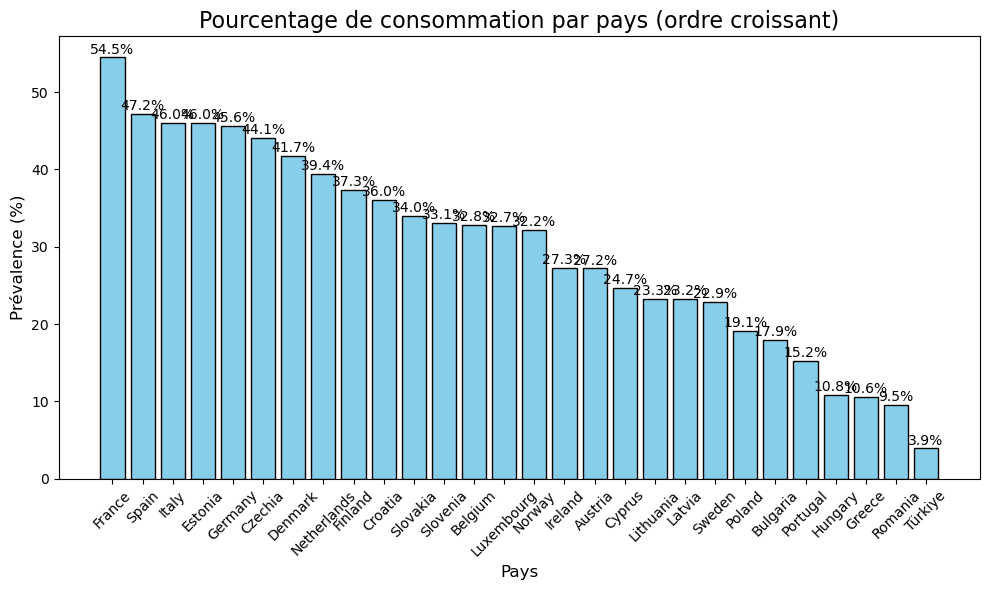

In [ ]:
dfcurrentyoung = dfcurrent[dfcurrent['Age'] == 'Young adults (15-34)']

dfcurrentyounglf = dfcurrentyoung[dfcurrentyoung['Recall period'] == 'Lifetime']

# Trier le DataFrame par ordre croissant de la colonne 'Prevalence (%)'
df_sorted = dfcurrentyounglf.sort_values(by='Prevalence (%)', ascending= False)

# Extraction des données triées
countries = df_sorted['Country']
prevalence = df_sorted['Prevalence (%)']

# Initialisation du graphique
plt.figure(figsize=(10, 6))

# Création du graphique en barres
plt.bar(countries, prevalence, color='skyblue', edgecolor='black')

# Ajout des titres et labels
plt.title('Pourcentage de consommation par pays (ordre croissant)', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Prévalence (%)', fontsize=12)

# Ajout des valeurs sur les barres (optionnel)
for i, value in enumerate(prevalence):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

# Rotation des étiquettes pour les pays si nécessaire
plt.xticks(rotation=45)

# Ajustement des marges
plt.tight_layout()

# Affichage
plt.show()